In [3]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

0.49524396946199234


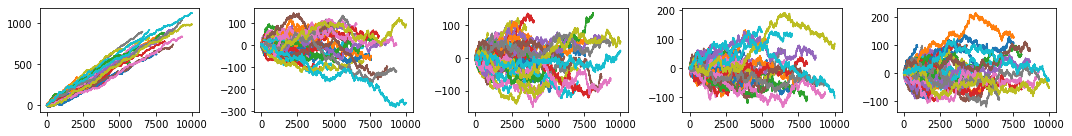

In [21]:
NTR = 30
T_MAX = np.logspace(0, 3, 100)
D = 5

d_mns = []

fig, axs = plt.subplots(1, D, figsize=(15, 2), tight_layout=True)

for t_max in T_MAX:
    ds = []
    for ctr in range(NTR):
        x_1 = np.random.randn(int(round(t_max*10)), D)
        x_2 = np.random.randn(int(round(t_max*10)), D)
        
        x_1[:, 0] += .1
        x_2[:, 0] += .1
        
        y_1 = x_1.cumsum(axis=0)
        y_2 = x_2.cumsum(axis=0)
        
        d = np.linalg.norm(y_1[-1, :] - y_2[-1, :])
        ds.append(d)
        
        if ctr == 0:
            for cax, ax in enumerate(axs):
                ax.plot(y_1[:, cax])
                ax.plot(y_2[:, cax])
        
    d_mns.append(np.mean(ds))
    
slp, icpt, r, p, stderr = linregress(np.log10(T_MAX), np.log10(d_mns))
print(slp)

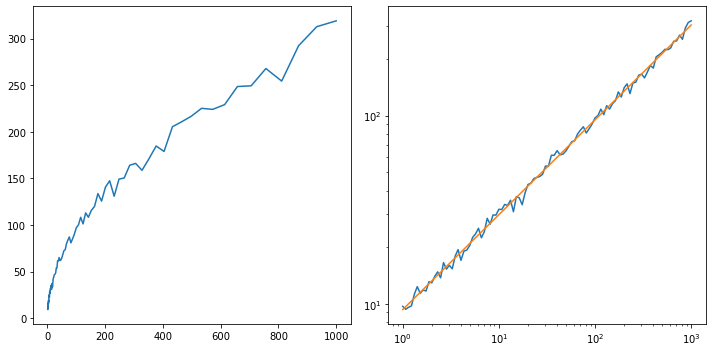

In [19]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5), tight_layout=True)
axs[0].plot(T_MAX, d_mns)
axs[1].loglog(T_MAX, d_mns)
axs[1].loglog(T_MAX, 10**(slp*np.log10(T_MAX)+icpt))